## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

pd.options.mode.chained_assignment = None  # default='warn'

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#loading data
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
print('Number of rows in the dataset: ', df.shape[0])

Number of rows in the dataset:  294478


c. The number of unique users in the dataset.

In [4]:
print('Number of unique users in the dataset: ',df['user_id'].nunique())

Number of unique users in the dataset:  290584


d. The proportion of users converted.

In [5]:
p_obs=df.query('converted==1')['user_id'].nunique()/len(df)
print('The proportion of users converted: ',p_obs)

The proportion of users converted:  0.1194418598333322


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
mismatch=len((df.query('(group=="treatment"&landing_page!="new_page")|\
              (group!="treatment"&landing_page=="new_page")')))
print('The number of times the new_page and treatment do not line up: ',mismatch)

The number of times the new_page and treatment do not line up:  3893


f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No rows have missing values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#removing rows where treatment is not aligned with new_page or 
#control is not aligned with old_page

df2=df.query('(group=="treatment"&landing_page=="new_page")|\
             (group=="control"&landing_page=="old_page")')

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print('Number of unique user_ids are in df2: ',df2['user_id'].nunique())

Number of unique user_ids are in df2:  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#finding repeated user_id
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
#rows with same user_id
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#dropping repeated user id
df2.drop_duplicates('user_id',inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
#calculating probability by finding proportion of converted in the dataset
p_tot_obs=df2['converted'].mean()
print('Observed probability of converting regardless of page: ',p_tot_obs)

Observed probability of converting regardless of page:  0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
#calculating probability by finding proportion of converted in control group
p_old_obs=df2.query('group=="control"')['converted'].mean()
print('Observed probability of converting for control group: ',p_old_obs)

Observed probability of converting for control group:  0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
#calculating probability by finding proportion of converted in treatment group
p_new_obs=df2.query('group=="treatment"')['converted'].mean()
print('Observed probability of converting for treatment group: ',p_new_obs)

Observed probability of converting for treatment group:  0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
#calculating probability by finding proportion of new_page receivers
n_new_obs=len(df2.query('landing_page=="new_page"'))/len(df2)
print('Observed probability of receiving new page: ',n_new_obs)

Observed probability of receiving new page:  0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

From the results, it can be seen that the probaility of conversion for control group (0.1204) is slightly higher than the probability of conversion for treatment group (0.1188). This opposes the statement that the new treatment page leads to more conversions. However since the statistical significance of the observed results is unknown, there is not sufficient evidence to conclude either that new treatment page leads to more conversions or that new treatment page doesn't lead to more conversions

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis:** $p_{new}-p_{old}\leq0$ 

**Alternate Hypothesis:** $p_{new}-p_{old}>0$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
#p_new would be same as observed total converted rate as per null assumption
p_new=p_tot_obs
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
#p_old would be same as observed total converted rate as per null assumption
p_old=p_tot_obs
p_old

0.11959708724499628

c. What is $n_{new}$?

In [20]:
#n_new would be same as size of df2 with new page as per null assumption
n_new=len(df2.query('landing_page=="new_page"'))
n_new

145310

d. What is $n_{old}$?

In [21]:
#n_old would be same as size of df2 with old page as per null assumption
n_old=len(df2.query('landing_page=="old_page"'))
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
#simulating n_new transactions with p_new
new_page_converted=np.random.choice([1,0],n_new,[p_new,1-p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
#simulating n_new transactions with p_old
old_page_converted=np.random.choice([1,0],n_old,[p_old,1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
#calculating difference in conversion for simulated values
p_new=new_page_converted.mean()
p_old=old_page_converted.mean()
p_new-p_old

-0.0018168446739701416

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
#simulating 10000 values for conversion differences
p_diffs=[]
p_old=p_tot_obs
p_new=p_tot_obs
n_new=len(df2.query('landing_page=="new_page"'))
n_old=len(df2.query('landing_page=="old_page"'))
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

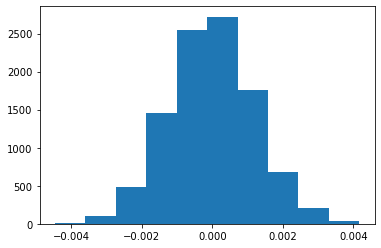

In [26]:
#plotting the sampling distribution of p_diffs under null assumption
p_diffs=np.array(p_diffs)
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
(p_diffs>(p_new_obs-p_old_obs)).mean()

0.9054

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In part j the p-value of observed difference is calculated. In other words we are calculating the probability of observing either the difference found from the sample or more extreme values (away from null) under the assumption that null hypothesis is true. Here this p-value is quite higher than the Type 1 erroe rate (0.05), indicating that we cannot reject our null hypothesis. Hence there statistically there is no differenec between conversion rates of new and old pages**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
n_old = len(df2.query('landing_page=="old_page"'))
n_new = len(df2.query('landing_page=="new_page"'))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
from statsmodels.stats.proportion import proportions_ztest
zscore, pval = proportions_ztest([convert_new,convert_old], [n_new,n_old],alternative='larger')
zscore, pval

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [30]:
#calculating critical z value for type 1 error=0.05 and single side test
from scipy.stats import norm
critical_zval=norm.ppf((1-0.05))
critical_zval

1.6448536269514722

**The z score indicates how many standard deviations away from the mean is the observed difference. Here the observed absolute z-score is 1.131 which is less than the critical value of 1.645 for one sided tests. Additionally the p value is the probability of observing either the sample difference or more extreme values (away from null). Here the p-value is higher than the type 1 error rate. These two indicate the null hypothesis cannot be rejected which agree with findings in previous parts**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since the dependent variable is categoriacal with two classes, logistic regression should be used**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
#creating intercept and ab_page columns
df2['intercept']=1
df2['ab_page']=df['group'].apply(lambda x: 1 if x=='treatment' else 0)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
#fitting logistics model
mod=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
res=mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
#summary of logit model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 01 Jul 2020   Pseudo R-squ.:               8.077e-06
Time:                        20:03:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page is 0.190. The value is different from the value found in Part II because the regression model considers a two sided test whereas Part II used one sided test. In other words, the null hypothesis here is that conversion rate for old and new page is equal whereas previously the null hypothesis was that the conversion rate for old page is higher or equal to new page**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**The conversion rate can depend on other factors like demographics of the user. Including these variable in the model can help us in predicting conversion more accurately. However there is a disadvantage to adding additional terms into regression model.The variables added could be correlated with each other which could give contradictory results**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [35]:
### Create the necessary dummy variables
countries=sorted(df_new['country'].unique())
df_new[countries]=pd.get_dummies(df_new['country'])
df_new[['new_page','old_page']]=pd.get_dummies(df_new['landing_page'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,new_page,old_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [36]:
df_new['intercept']=1
#logit model with countries dummy variable
mod2=sm.Logit(df_new['converted'],df_new[['new_page','US','UK','intercept']])
mod2.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 01 Jul 2020   Pseudo R-squ.:               2.323e-05
Time:                        20:03:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
new_page      -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
==============================================================================
"""

The p values of both US and UK are not significant at 95%. This shows that countries might not have impact on conversion rates. The p value of new_page is also not significant

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [37]:
# creating dummy variables
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,new_page,old_page,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0,1,0


In [38]:
#fitting logit model
mod3=sm.Logit(df_new['converted'],df_new[['new_page','US','UK','US_ab_page','UK_ab_page','intercept']])
mod3.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 01 Jul 2020   Pseudo R-squ.:               3.482e-05
Time:                        20:03:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
new_page      -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
==============================================================================
"""

None of the variables are significant at 95% confidence. The interaction terms were also not significant. This indicates that effect of new_page on conversion doesn't change significantly with different countries

<a id='conclusions'></a>
## Conclusions

1. The observed conversion rate for old page was slightly higher than the observed conversion rate for new page in sample.

2. The sampling distribution of differences in conversion rate was obtained from the simulation assuming that the null hypothesis that conversion rate of old page is higher or equal to new page. The p value of observed difference was not small enough to reject the null hypthesis. 

3. The logistic models fit with only landing page dummy variable as well as with both country and landing page dummy variables showed that variables were not significant at 95% confidence. 

These observations indicate that there is no statistical evidence to show that the new page has higher conversion rate than the old page based on the given sample. However for practical application, the new page cannot be surely rejected since there could be limitations in the sample due to novelty bias, insufficient data.